# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


In [80]:
# Set the API base URL
import json
import requests
import datetime

url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = url + "&units=metric" + "&appid=" + weather_api_key
query_url

'https://api.openweathermap.org/data/2.5/weather?&units=metric&appid=5e8302f445aa6fde2145644674cb5e55'

In [81]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
     
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
      
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    
    #for city in cities:   
     # Parse the JSON and retrieve data
    city_url = query_url + "&q=" + city
    response = requests.get(city_url)
    city_weather = response.json()

    # Run an API request for each of the cities
    try:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ridgecrest
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | kapit
Processing Record 10 of Set 1 | muzhi
Processing Record 11 of Set 1 | saurimo
Processing Record 12 of Set 1 | treinta y tres
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | vardo
Processing Record 17 of Set 1 | bolobo
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | amapa
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of 

Processing Record 40 of Set 4 | alofi
Processing Record 41 of Set 4 | mehamn
Processing Record 42 of Set 4 | falavarjan
Processing Record 43 of Set 4 | umm ruwabah
City not found. Skipping...
Processing Record 44 of Set 4 | miracema do tocantins
Processing Record 45 of Set 4 | kamenka
Processing Record 46 of Set 4 | champerico
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | mount isa
Processing Record 49 of Set 4 | tamandare
Processing Record 50 of Set 4 | taree
Processing Record 1 of Set 5 | etchojoa
Processing Record 2 of Set 5 | kavaratti
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | montepuez
Processing Record 5 of Set 5 | mangrol
Processing Record 6 of Set 5 | tuban
Processing Record 7 of Set 5 | san policarpo
Processing Record 8 of Set 5 | saint-joseph
Processing Record 9 of Set 5 | hofn
Processing Record 10 of Set 5 | thompson
Processing Record 11 of Set 5 | nome
Processing Record 12 of Set 5 | barentsburg
City not found. S

Processing Record 25 of Set 8 | kautokeino
Processing Record 26 of Set 8 | amderma
City not found. Skipping...
Processing Record 27 of Set 8 | vila franca do campo
Processing Record 28 of Set 8 | sao felix do xingu
Processing Record 29 of Set 8 | aliaga
Processing Record 30 of Set 8 | saint anthony
Processing Record 31 of Set 8 | upington
Processing Record 32 of Set 8 | nemuro
Processing Record 33 of Set 8 | lithakia
Processing Record 34 of Set 8 | vanimo
Processing Record 35 of Set 8 | wuda
Processing Record 36 of Set 8 | semnan
Processing Record 37 of Set 8 | ransang
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | nanortalik
Processing Record 40 of Set 8 | sitka
Processing Record 41 of Set 8 | navolato
Processing Record 42 of Set 8 | san jeronimo
Processing Record 43 of Set 8 | nuevo progreso
Processing Record 44 of Set 8 | mamallapuram
Processing Record 45 of Set 8 | olinda
Processing Record 46 of Set 8 | port keats
Processing Record 47 of Set 8 | ancu

Processing Record 12 of Set 12 | lephepe
City not found. Skipping...
Processing Record 13 of Set 12 | luangwa
Processing Record 14 of Set 12 | bellevue
Processing Record 15 of Set 12 | lima
Processing Record 16 of Set 12 | napasar
Processing Record 17 of Set 12 | olhao
Processing Record 18 of Set 12 | manokwari
Processing Record 19 of Set 12 | sibenik
Processing Record 20 of Set 12 | santa lucia
Processing Record 21 of Set 12 | sosnovo-ozerskoye
Processing Record 22 of Set 12 | dakar
Processing Record 23 of Set 12 | moose factory
Processing Record 24 of Set 12 | bozoum
Processing Record 25 of Set 12 | avera
Processing Record 26 of Set 12 | georgiyevka
Processing Record 27 of Set 12 | evanston
Processing Record 28 of Set 12 | ikwiriri
Processing Record 29 of Set 12 | havre-saint-pierre
Processing Record 30 of Set 12 | santiago
Processing Record 31 of Set 12 | noyabrsk
Processing Record 32 of Set 12 | raton
Processing Record 33 of Set 12 | inegol
Processing Record 34 of Set 12 | ayan
Pro

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [82]:
#checking city_data list
city_data[0]


{'City': 'ridgecrest',
 'Lat': 35.6225,
 'Lng': -117.6709,
 'Max Temp': 15.94,
 'Humidity': 36,
 'Cloudiness': 40,
 'Wind Speed': 6.26,
 'Country': 'US',
 'Date': 1670270812}

In [83]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

In [84]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ridgecrest,35.6225,-117.6709,15.94,36,40,6.26,US,1670270812
1,hermanus,-34.4187,19.2345,14.33,64,100,1.42,ZA,1670270813
2,hobart,-42.8794,147.3294,11.81,69,75,5.66,AU,1670270407
3,castro,-24.7911,-50.0119,23.54,78,58,2.86,BR,1670270517
4,iqaluit,63.7506,-68.5145,-15.22,95,100,1.06,CA,1670270814


In [85]:
#checking dtypes
city_data_df.dtypes



City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [86]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ridgecrest,35.6225,-117.6709,15.94,36,40,6.26,US,1670270812
1,hermanus,-34.4187,19.2345,14.33,64,100,1.42,ZA,1670270813
2,hobart,-42.8794,147.3294,11.81,69,75,5.66,AU,1670270407
3,castro,-24.7911,-50.0119,23.54,78,58,2.86,BR,1670270517
4,iqaluit,63.7506,-68.5145,-15.22,95,100,1.06,CA,1670270814


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

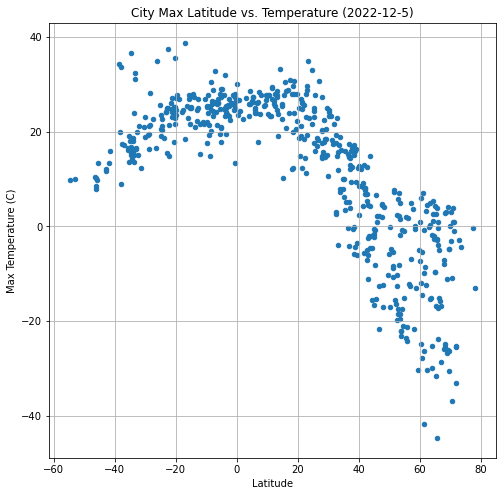

In [88]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat",y="Max Temp", grid=True, figsize = (8,8), title="City Max Latitude vs. Temperature (2022-12-5)",xlabel="Latitude",ylabel="Max Temperature (C)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

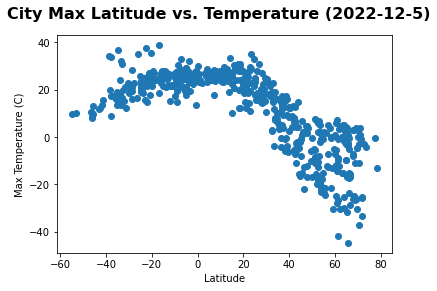

In [103]:
from scipy import stats
from scipy.stats import linregress
Latitude = city_data_df["Lat"]
Max_Temp = city_data_df["Max Temp"]
plt.scatter(Latitude,Max_Temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.suptitle("City Max Latitude vs. Temperature (2022-12-5)", fontsize=16, fontweight="bold")
# Save the figure
plt.savefig("output_data/Fig1b.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

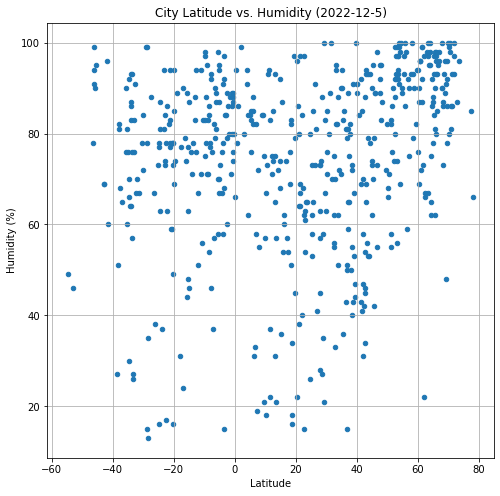

In [90]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat",y="Humidity", grid=True, figsize = (8,8), title="City Latitude vs. Humidity (2022-12-5)",xlabel="Latitude",ylabel="Humidity (%)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

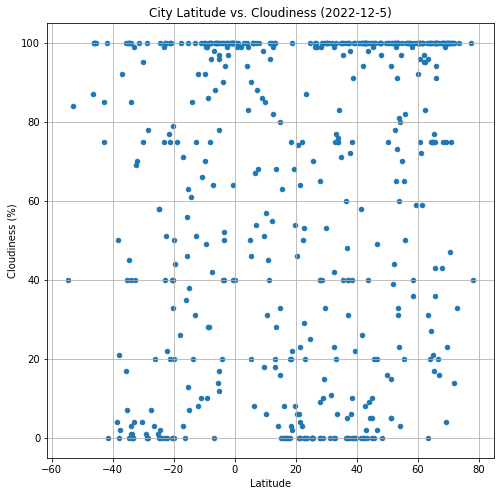

In [91]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat",y="Cloudiness", grid=True, figsize = (8,8), title="City Latitude vs. Cloudiness (2022-12-5)",xlabel="Latitude",ylabel="Cloudiness (%)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

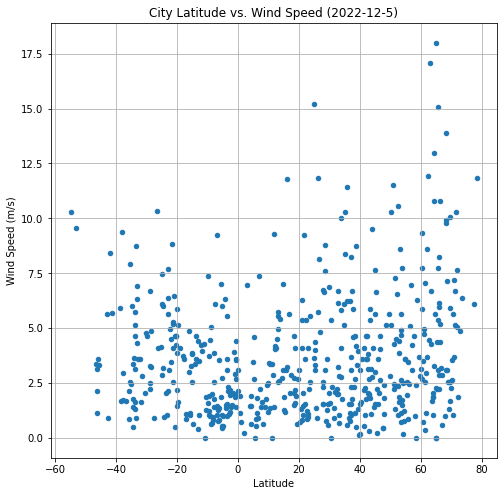

In [92]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat",y="Wind Speed", grid=True, figsize = (8,8), title="City Latitude vs. Wind Speed (2022-12-5)",xlabel="Latitude",ylabel="Wind Speed (m/s)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


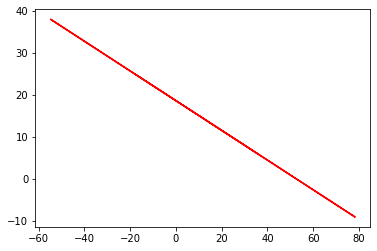

In [104]:
# Define a function to create Linear Regression plots
lat_slope, lat_int, lat_r, lat_p, plat_std_err = stats.linregress(xvalue,yvalue)
regress_values = Latitude * lat_slope + lat_int
plt.plot(xvalue,regress_values, "r-")

In [105]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ridgecrest,35.6225,-117.6709,15.94,36,40,6.26,US,1670270812
4,iqaluit,63.7506,-68.5145,-15.22,95,100,1.06,CA,1670270814
7,kapaa,22.0752,-159.3190,25.61,84,75,1.54,US,1670270720
8,kapit,2.0167,112.9333,22.72,99,99,0.25,MY,1670270815
9,muzhi,65.3667,64.6667,-16.90,97,77,2.22,RU,1670270816


In [106]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,14.33,64,100,1.42,ZA,1670270813
2,hobart,-42.8794,147.3294,11.81,69,75,5.66,AU,1670270407
3,castro,-24.7911,-50.0119,23.54,78,58,2.86,BR,1670270517
5,kruisfontein,-34.0033,24.7314,15.49,87,1,3.66,ZA,1670270814
6,ushuaia,-54.8000,-68.3000,9.79,49,40,10.29,AR,1670270805


###  Temperature vs. Latitude Linear Regression Plot

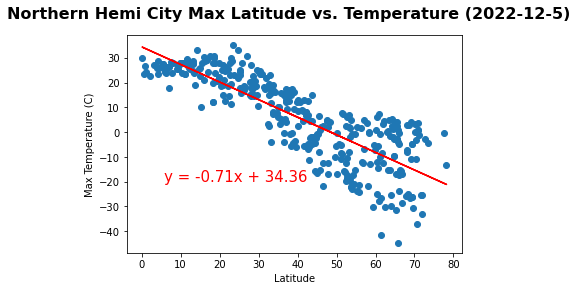

In [121]:
# Linear regression on Northern Hemisphere
Latitude_n = northern_hemi_df["Lat"]
Max_Temp_n = northern_hemi_df["Max Temp"]
plt.scatter(Latitude_n,Max_Temp_n)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.suptitle("Northern Hemi City Max Latitude vs. Temperature (2022-12-5)", fontsize=16, fontweight="bold")
slope_n, int_n, r_n, p_n, std_err_n = stats.linregress(Latitude_n,Max_Temp_n)
regress_values_n = Latitude_n * slope_n + int_n
line_eq_n ="y = " + str(round(slope_n,2)) + "x + " + str(round(int_n,2))
plt.plot(Latitude_n,regress_values_n, "r-")
plt.annotate(line_eq_n,(5.8,-20),fontsize=15,color="red")
# Show plot
plt.show()
# YOUR CODE HERE

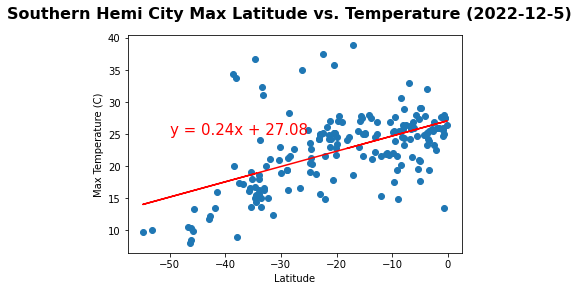

In [122]:
# Linear regression on Southern Hemisphere
Latitude_s = southern_hemi_df["Lat"]
Max_Temp_s = southern_hemi_df["Max Temp"]
plt.scatter(Latitude_s,Max_Temp_s)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.suptitle("Southern Hemi City Max Latitude vs. Temperature (2022-12-5)", fontsize=16, fontweight="bold")
slope_s, int_s, r_s, p_s, std_err_s = stats.linregress(Latitude_s,Max_Temp_s)
line_eq_s ="y = " + str(round(slope_s,2)) + "x + " + str(round(int_s,2))
regress_values_s = Latitude_s * slope_s + int_s
plt.plot(Latitude_s,regress_values_s, "r-")
plt.annotate(line_eq_s,(-50,25),fontsize=15,color="red")
# Show plot
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

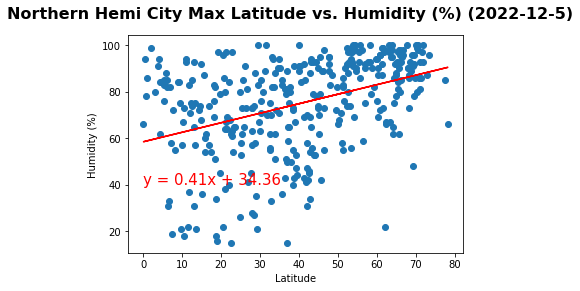

In [127]:
# Northern Hemisphere
Latitude_n = northern_hemi_df["Lat"]
Humidity_n = northern_hemi_df["Humidity"]
plt.scatter(Latitude_n,Humidity_n)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.suptitle("Northern Hemi City Max Latitude vs. Humidity (%) (2022-12-5)", fontsize=16, fontweight="bold")
slope_nh, int_nh, r_nh, p_nh, std_err_nh = stats.linregress(Latitude_n,Humidity_n)
line_eq_nh ="y = " + str(round(slope_nh,2)) + "x + " + str(round(int_n,2))
regress_values_nh = Latitude_n * slope_nh + int_nh
plt.annotate(line_eq_nh,(0,40),fontsize=15,color="red")
plt.plot(Latitude_n,regress_values_nh, "r-")

# Show plot
plt.show()
# YOUR CODE HERE

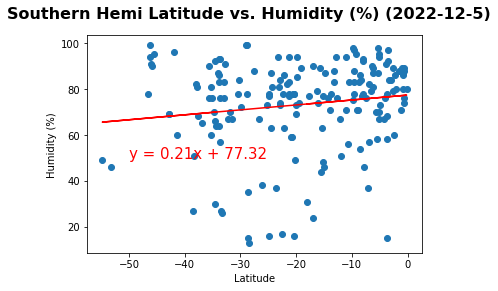

In [131]:
# Southern Hemisphere
Latitude_s = southern_hemi_df["Lat"]
Humidity_s = southern_hemi_df["Humidity"]
plt.scatter(Latitude_s,Humidity_s)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.suptitle("Southern Hemi Latitude vs. Humidity (%) (2022-12-5)", fontsize=16, fontweight="bold")
slope_sh, int_sh, r_sh, p_sh, std_err_sh = stats.linregress(Latitude_s,Humidity_s)
line_eq_sh ="y = " + str(round(slope_sh,2)) + "x + " + str(round(int_sh,2))
regress_values_sh = Latitude_s * slope_sh + int_sh
plt.annotate(line_eq_sh,(-50,50),fontsize=15,color="red")
plt.plot(Latitude_s,regress_values_sh, "r-")
# YOUR CODE HERE
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

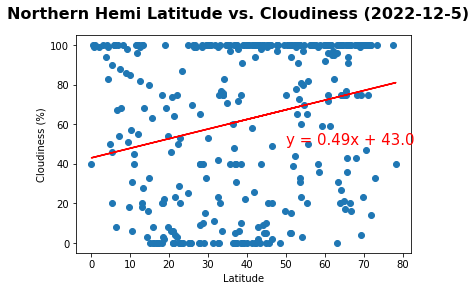

In [134]:
# Northern Hemisphere
Latitude_n = northern_hemi_df["Lat"]
Cloudiness_n = northern_hemi_df["Cloudiness"]
plt.scatter(Latitude_n,Cloudiness_n)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.suptitle("Northern Hemi Latitude vs. Cloudiness (2022-12-5)", fontsize=16, fontweight="bold")
slope_nc, int_nc, r_nc, p_nc, std_err_nc = stats.linregress(Latitude_n,Cloudiness_n)
line_eq_nc ="y = " + str(round(slope_nc,2)) + "x + " + str(round(int_nc,2))
regress_values_nc = Latitude_n * slope_nc + int_nc
plt.annotate(line_eq_nc,(50,50),fontsize=15,color="red")
plt.plot(Latitude_n,regress_values_nc, "r-")

# Show plot
plt.show()
# YOUR CODE HERE

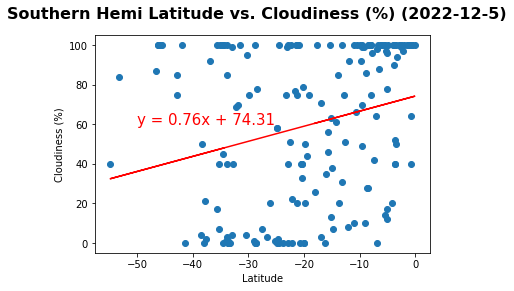

In [136]:
# Southern Hemisphere
Latitude_s = southern_hemi_df["Lat"]
Cloudiness_s = southern_hemi_df["Cloudiness"]
plt.scatter(Latitude_s,Cloudiness_s)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.suptitle("Southern Hemi Latitude vs. Cloudiness (%) (2022-12-5)", fontsize=16, fontweight="bold")
slope_sc, int_sc, r_sc, p_sc, std_err_sc = stats.linregress(Latitude_s,Cloudiness_s)
line_eq_sc ="y = " + str(round(slope_sc,2)) + "x + " + str(round(int_sc,2))
regress_values_sc = Latitude_s * slope_sc + int_sc
plt.annotate(line_eq_sc,(-50,60),fontsize=15,color="red")
plt.plot(Latitude_s,regress_values_sc, "r-")
# YOUR CODE HERE
plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

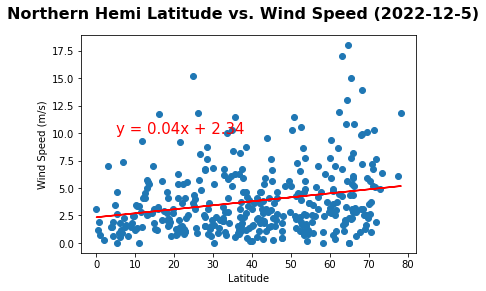

In [139]:
# Northern Hemisphere
Latitude_n = northern_hemi_df["Lat"]
Wind_n = northern_hemi_df["Wind Speed"]
plt.scatter(Latitude_n,Wind_n)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.suptitle("Northern Hemi Latitude vs. Wind Speed (2022-12-5)", fontsize=16, fontweight="bold")
slope_nw, int_nw, r_nw, p_nw, std_err_nw = stats.linregress(Latitude_n,Wind_n)
line_eq_nw ="y = " + str(round(slope_nw,2)) + "x + " + str(round(int_nw,2))
regress_values_nw = Latitude_n * slope_nw + int_nw
plt.annotate(line_eq_nw,(5,10),fontsize=15,color="red")
plt.plot(Latitude_n,regress_values_nw, "r-")

# Show plot
plt.show()
# YOUR CODE HERE

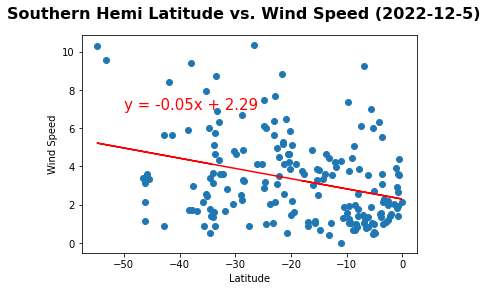

In [142]:
# Southern Hemisphere
# Southern Hemisphere
Latitude_s = southern_hemi_df["Lat"]
Wind_s = southern_hemi_df["Wind Speed"]
plt.scatter(Latitude_s,Wind_s)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.suptitle("Southern Hemi Latitude vs. Wind Speed (2022-12-5)", fontsize=16, fontweight="bold")
slope_sw, int_sw, r_sw, p_sw, std_err_sw = stats.linregress(Latitude_s,Wind_s)
line_eq_sw ="y = " + str(round(slope_sw,2)) + "x + " + str(round(int_sw,2))
regress_values_sw = Latitude_s * slope_sw + int_sw
plt.annotate(line_eq_sw,(-50,7),fontsize=15,color="red")
plt.plot(Latitude_s,regress_values_sw, "r-")
# YOUR CODE HERE
plt.show()
# YOUR CODE HERE
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [145]:
print("Discussion about the linear relationship: " )
print("In the Northern Hemisphere, as Latitude increases (get farther from equator), temperature decreases.")
print("In the Southern Hemisphere, as the latitude values get farther from the equator, temperature decreases.")

print("Interestingly, in the North Hemisphere, as you get farther from the equator, humidity increases, but in the Southern Hemisphere, the opposite happens, humidity increases as you get closer to the equator.")

print("Cloudiness increases the farther North you go on both the northern and southern hemispheres.")

print("Wind Speed increase the farther you are from the equator on both the southern and northern hemispheres.")


Discussion about the linear relationship: 
In the Northern Hemisphere, as Latitude increases (get farther from equator), temperature decreases.
In the Southern Hemisphere, as the latitude values get farther from the equator, temperature decreases.
Interestingly, in the North Hemisphere, as you get farther from the equator, humidity increases, but in the Southern Hemisphere, the opposite happens, humidity increases as you get closer to the equator.
Cloudiness increases the farther North you go on both the northern and southern hemispheres.
Wind Speed increase the farther you are from the equator on both the southern and northern hemispheres.
